In [102]:
import pandas as pd
import numpy as np

In [103]:
# Importing the chembl_database
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [105]:
# PART 1

# Target search for hcm using tnni3
target = new_client.target
target_query = target.search('tnni3')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Serine/threonine-protein kinase TNNI3K,15.0,False,CHEMBL4879467,"[{'accession': 'Q5GIG6', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Rattus norvegicus,Serine/threonine-protein kinase TNNI3K,14.0,False,CHEMBL4802010,"[{'accession': 'Q7TQP6', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Homo sapiens,Serine/threonine-protein kinase TNNI3K,13.0,False,CHEMBL5260,"[{'accession': 'Q59H18', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,"Troponin, cardiac muscle",11.0,False,CHEMBL2095202,"[{'accession': 'P63316', 'component_descriptio...",PROTEIN COMPLEX,9606


In [106]:
# Retrieve data for the single protein for humans
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL5260'

In [107]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [108]:
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,15698897,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,500.0
1,None,15698898,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,25000.0
2,None,15698899,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,3200.0
3,None,15698900,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,8000.0
4,None,15698901,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,16000.0


In [109]:
# Filtering the ones with unique value of IC50
df.standard_type.unique()

array(['IC50'], dtype=object)

In [110]:
df.to_csv('bioactivity_data.csv', index=False)

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# Dropping any values without the standard type
# Dropping rows with null values for standard type

df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,15698897,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,500.0
1,None,15698898,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,25000.0
2,None,15698899,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,3200.0
3,None,15698900,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,8000.0
4,None,15698901,[],CHEMBL3615799,Displacement of 5-({[2-({[3-({4-[(5-hydroxy-2-...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,16000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,None,23299501,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4841801,Inhibition of human myc-TNNI3K expressed in HE...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,100.0
295,None,23299502,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4841801,Inhibition of human myc-TNNI3K expressed in HE...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,IC50,nM,UO_0000065,None,8.0
296,None,23372920,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884885,HH498(TNNILGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,pIC50,None,UO_0000065,None,6.0
297,None,23373329,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885176,HH498(TNNILGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase TNNI3K,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [113]:
# PART 2

# DATA PRE-PROCESSING

# Compounds are segregated based on a certain criteria of IC50 value

# Segregation is happening based on standard value

# Compounds having values of less than 1000 nM will be considered to be active
# those greater than 10,000 nM will be considered to be inactive. 
# values in between 1,000 and 10,000 nM will be referred to as intermediate.

bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [114]:
#Iterate the "molecule_chembl_id" to a list
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [115]:
# Iterate "canonical_smiles" to a list
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [116]:
# Iterate standard_value to a list
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [117]:
# Combine the 4 lists into a dataframe
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL3612641,CNS(=O)(=O)c1cccc(Nc2ncnc3[nH]cnc23)c1,active,500.0
1,CHEMBL3612643,CNS(=O)(=O)c1cccc(Nc2ncnc3c2ncn3C)c1,inactive,25000.0
2,CHEMBL3612642,CNS(=O)(=O)c1cccc(Nc2nc(F)nc3[nH]cnc23)c1,intermediate,3200.0
3,CHEMBL3612644,CNS(=O)(=O)c1cccc(Nc2nc(N)nc3[nH]cnc23)c1,intermediate,8000.0
4,CHEMBL3612645,CNS(=O)(=O)c1cccc(Nc2nc(Cl)nc3[nH]cnc23)c1,inactive,16000.0
...,...,...,...,...
292,CHEMBL3815093,CNS(=O)(=O)c1ccc(N(C)C)c(Nc2ncnc3cc(OC)c(OC)cc...,active,100.0
293,CHEMBL4094739,CCS(=O)(=O)c1ccc(S(=O)(=O)NC)cc1Nc1cc(Nc2ccc(C...,active,8.0
294,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,1000.0
295,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,1000.0


In [118]:
# storing df as a csv file
df3.to_csv('bioactivity_data_preprocessed.csv', index=False)

In [119]:
! ls -l

total 192832
-rw-r--r-- 1 root root   199379 Jan 10 15:22 bioactivity_data.csv
-rw-r--r-- 1 root root    23098 Jan 10 15:22 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   539408 Jan 10 15:11 descriptors_output.csv
-rw-r--r-- 1 root root    36852 Jan 10 15:08 df_combined.csv
drwx------ 5 root root     4096 Jan 10 14:47 drive
-rw-r--r-- 1 root root   538814 Jan 10 15:11 final_matrix_ic50_only.csv
drwxr-xr-x 3 root root     4096 Jan 10 15:10 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r--r-- 1 root root    19122 Jan 10 15:10 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jan 10 15:10 padel.sh
-rw-r--r-- 1 root root 25768637 Jan 10 15:10 padel.zip
-rw-r--r-- 1 root root    14170 Jan 10 15:08 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15727 Jan 10 15:08 plot_ic50.pdf
-rw-r--r

In [120]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-01-10 15:22:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   189MB/s    in 0.4s    

2023-01-10 15:22:33 (189 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::requests==2.22.0=py37_1
  - defaults/linux-64::pip==20.0.2=py37_1
  - defaults/linux-64::wheel==0.34.2=py37_0
  - defaults/linux-64::openssl==1.1.1

In [121]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

In [122]:
# PART 3

# Calculating Lipinski descripters
# Describes the drug-likeness of a compound. Based on ADME (Absorptive, Distribution, Metabolism, and Excretion). 
# The rule stays fixed where properties such as H-bond and molecular weight are to be lesser than a certain value only and such.

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [123]:
# To calculate the Lipinski descripters
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [124]:
# Provides exact atomic details 
df_lipinski = lipinski(df.canonical_smiles)

# Further details as per the Lipinski parameters
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,304.335,1.0046,3.0,6.0
1,318.362,1.0150,2.0,7.0
2,322.325,1.1437,3.0,6.0
3,319.350,0.5868,4.0,7.0
4,338.780,1.6580,3.0,6.0
...,...,...,...,...
292,417.491,2.3647,2.0,8.0
293,482.975,2.7139,3.0,9.0
294,402.454,2.3537,0.0,5.0
295,481.350,3.1162,0.0,5.0


In [125]:
# The lipinski values and the original dataframe are combined to an all in one
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined.to_csv('df_combined.csv')
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3612641,CNS(=O)(=O)c1cccc(Nc2ncnc3[nH]cnc23)c1,active,500.0,304.335,1.0046,3.0,6.0
1,CHEMBL3612643,CNS(=O)(=O)c1cccc(Nc2ncnc3c2ncn3C)c1,inactive,25000.0,318.362,1.0150,2.0,7.0
2,CHEMBL3612642,CNS(=O)(=O)c1cccc(Nc2nc(F)nc3[nH]cnc23)c1,intermediate,3200.0,322.325,1.1437,3.0,6.0
3,CHEMBL3612644,CNS(=O)(=O)c1cccc(Nc2nc(N)nc3[nH]cnc23)c1,intermediate,8000.0,319.350,0.5868,4.0,7.0
4,CHEMBL3612645,CNS(=O)(=O)c1cccc(Nc2nc(Cl)nc3[nH]cnc23)c1,inactive,16000.0,338.780,1.6580,3.0,6.0
...,...,...,...,...,...,...,...,...
292,CHEMBL3815093,CNS(=O)(=O)c1ccc(N(C)C)c(Nc2ncnc3cc(OC)c(OC)cc...,active,100.0,417.491,2.3647,2.0,8.0
293,CHEMBL4094739,CCS(=O)(=O)c1ccc(S(=O)(=O)NC)cc1Nc1cc(Nc2ccc(C...,active,8.0,482.975,2.7139,3.0,9.0
294,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,1000.0,402.454,2.3537,0.0,5.0
295,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,1000.0,481.350,3.1162,0.0,5.0


In [126]:
# Convert ic50 to pic50
# pic50 is bsaically -log10 of ic50

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
        
    return x

In [127]:
# pic50 is performed on standard value in df_combined
df_final = pIC50(df_combined)
df_final

<ipython-input-126-9faa7b5de017>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3612641,CNS(=O)(=O)c1cccc(Nc2ncnc3[nH]cnc23)c1,active,304.335,1.0046,3.0,6.0,6.30103
1,CHEMBL3612643,CNS(=O)(=O)c1cccc(Nc2ncnc3c2ncn3C)c1,inactive,318.362,1.0150,2.0,7.0,4.60206
2,CHEMBL3612642,CNS(=O)(=O)c1cccc(Nc2nc(F)nc3[nH]cnc23)c1,intermediate,322.325,1.1437,3.0,6.0,5.49485
3,CHEMBL3612644,CNS(=O)(=O)c1cccc(Nc2nc(N)nc3[nH]cnc23)c1,intermediate,319.350,0.5868,4.0,7.0,5.09691
4,CHEMBL3612645,CNS(=O)(=O)c1cccc(Nc2nc(Cl)nc3[nH]cnc23)c1,inactive,338.780,1.6580,3.0,6.0,4.79588
...,...,...,...,...,...,...,...,...
292,CHEMBL3815093,CNS(=O)(=O)c1ccc(N(C)C)c(Nc2ncnc3cc(OC)c(OC)cc...,active,417.491,2.3647,2.0,8.0,7.00000
293,CHEMBL4094739,CCS(=O)(=O)c1ccc(S(=O)(=O)NC)cc1Nc1cc(Nc2ccc(C...,active,482.975,2.7139,3.0,9.0,8.09691
294,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.3537,0.0,5.0,6.00000
295,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.1162,0.0,5.0,6.00000


In [128]:
# PART 4

# Chemical space analysis w lipinski descriptors
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

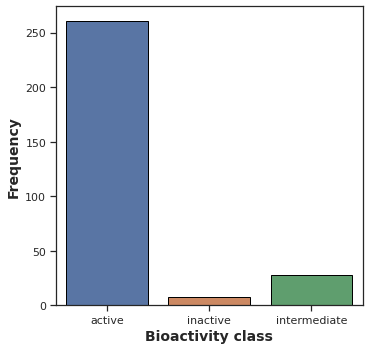

In [129]:
# Frequency plot of the combined data
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_combined, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

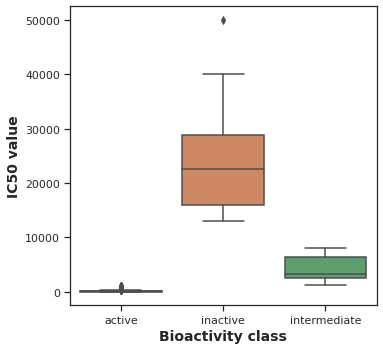

In [130]:
# Box plot for all the three variants wrt to their type and their respective standard values
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'standard_value', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('IC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

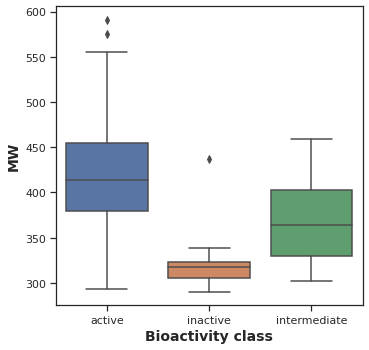

In [131]:
# Box plots for the other 4 Lipinski descripters

# M W

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

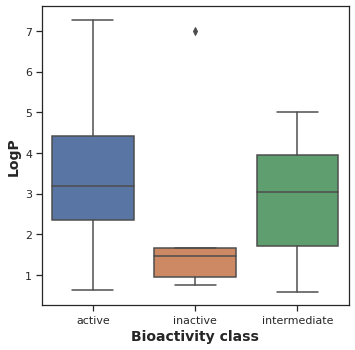

In [132]:
# Log P
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

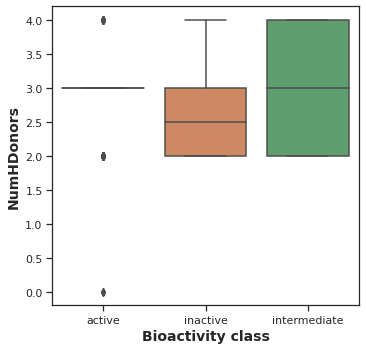

In [133]:
# NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

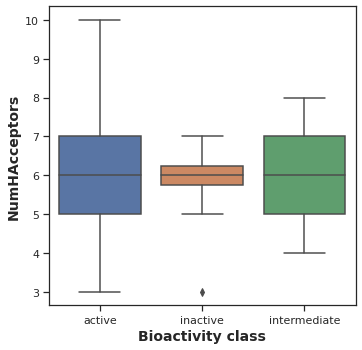

In [134]:
# NumHAcceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [135]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_NumHAcceptors.pdf (deflated 35%)
updating: plot_NumHDonors.pdf (deflated 37%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: bioactivity_data.csv (deflated 94%)
updating: bioactivity_data_preprocessed.csv (deflated 87%)
updating: df_combined.csv (deflated 83%)
updating: plot_MW.pdf (deflated 37%)
updating: plot_ic50.pdf (deflated 36%)
updating: plot_LogP.pdf (deflated 36%)
  adding: descriptors_output.csv (deflated 96%)
  adding: final_matrix_ic50_only.csv (deflated 96%)


In [157]:
# PART 5
# lipinski descriptors provide very simple molecular descriptor overview of the drug like properties
# padel will be used to calculate molecular descriptors


In [156]:
! unzip /content/drive/MyDrive/padel.zip

Archive:  /content/drive/MyDrive/padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._PaDEL-Descriptor  
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
replace __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
replace PaDEL-Descriptor/AtomPairs2DFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
replace __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
replace PaDEL-Descriptor/EStateFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
replace __MACOSX/PaDEL-Descriptor/._EStateFinge

In [138]:
# The same file as that of df_combined
df4=pd.read_csv('df_combined.csv')

In [139]:
# canonical_smiles and molecule_chembl_id is filtered and placed into a new variable 
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df4[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [140]:
# It contains the smiles notation and the particular molecule
# Smiles notation represents the chemical structure

! cat molecule.smi | head -5

CNS(=O)(=O)c1cccc(Nc2ncnc3[nH]cnc23)c1	CHEMBL3612641
CNS(=O)(=O)c1cccc(Nc2ncnc3c2ncn3C)c1	CHEMBL3612643
CNS(=O)(=O)c1cccc(Nc2nc(F)nc3[nH]cnc23)c1	CHEMBL3612642
CNS(=O)(=O)c1cccc(Nc2nc(N)nc3[nH]cnc23)c1	CHEMBL3612644
CNS(=O)(=O)c1cccc(Nc2nc(Cl)nc3[nH]cnc23)c1	CHEMBL3612645


In [141]:
# Cleans the data of any impurities like salts,acids and such. 
# It then calculates the finger print values of the type pubchem finger prints

! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [142]:
! bash padel.sh

Processing CHEMBL3612641 in molecule.smi (1/297). 
Processing CHEMBL3612643 in molecule.smi (2/297). 
Processing CHEMBL3612642 in molecule.smi (3/297). Average speed: 2.29 s/mol.
Processing CHEMBL3612644 in molecule.smi (4/297). Average speed: 1.21 s/mol.
Processing CHEMBL3612645 in molecule.smi (5/297). Average speed: 0.94 s/mol.
Processing CHEMBL3612647 in molecule.smi (7/297). Average speed: 0.65 s/mol.
Processing CHEMBL3612646 in molecule.smi (6/297). Average speed: 0.76 s/mol.
Processing CHEMBL3612648 in molecule.smi (8/297). Average speed: 0.59 s/mol.
Processing CHEMBL3612649 in molecule.smi (9/297). Average speed: 0.54 s/mol.
Processing CHEMBL3612650 in molecule.smi (10/297). Average speed: 0.57 s/mol.
Processing CHEMBL3612651 in molecule.smi (11/297). Average speed: 0.48 s/mol.
Processing CHEMBL3612652 in molecule.smi (12/297). Average speed: 0.44 s/mol.
Processing CHEMBL3612653 in molecule.smi (13/297). Average speed: 0.40 s/mol.
Processing CHEMBL3612654 in molecule.smi (14/29

In [143]:
# Preparing data matrices

# This matrix consists of the data descriptors (pubchem fingerprints) for every molecule
# Pubchem fingerprints are molecular features.

dataset3 = pd.read_csv('descriptors_output.csv')
dataset3

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3612641,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3612643,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3612642,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3612644,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3612645,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,CHEMBL3815093,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,CHEMBL4094739,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,CHEMBL4549667,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
dataset3.to_csv('final_matrix_ic50_only.csv', index=False)

In [145]:
dataset3 = dataset3.drop(columns=['Name'])

In [146]:
# PART 6

# Model building
# X - pubchem finger prints 
# Y - pic50 values 

X = dataset3
Y = df_final.pIC50
X.shape
Y.shape

(297,)

In [147]:
# lipinski descriptors majorly talk about the global aspects of a molecule like solubility and h bond related stuff 
# whereas pubchem fingerprints prev created talk more of the local aspects such as within the molecule prop stuff

In [148]:
# Remove low variance features 
# Reduces the number of columns 

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn
import math

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [149]:
X.shape

(297, 110)

In [150]:
# Data split 8:2 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)
X_train.shape, Y_train.shape

((237, 110), (237,))

In [151]:
X_test.shape, Y_test.shape

((60, 110), (60,))

In [152]:
# Regression model using Random Forest
import numpy as np
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([7.52354131, 7.21636048, 8.05524786, 7.48177767, 7.61269624,
       7.61269624, 7.58429707, 7.37016314, 7.15370809, 7.15151017,
       7.35744447, 6.7962181 , 5.44579219, 7.28731631, 7.46214788,
       6.3290617 , 6.13810772, 7.06832064, 6.61293386, 7.2286557 ,
       7.61856556, 5.44579219, 6.40193166, 6.89697034, 7.58429707,
       6.350455  , 6.6711189 , 6.17993531, 7.27861654, 7.98925896,
       5.32439161, 6.93192408, 6.88117518, 7.17742273, 5.44579219,
       7.04130832, 7.98925896, 7.26829504, 7.65154039, 6.86912189,
       5.46679562, 7.25016518, 6.75444138, 7.5224917 , 7.39108089,
       5.35697748, 6.93606089, 7.16456668, 7.84444579, 7.61856556,
       6.52662805, 7.59563688, 6.57935999, 7.88222955, 6.52662805,
       7.52503388, 5.80439251, 6.83784935, 7.03856112, 6.19454205])

In [153]:
mse = sklearn.metrics.mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',max(0,rmse))

Accuracy for Random Forest 0.7845668609056582


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

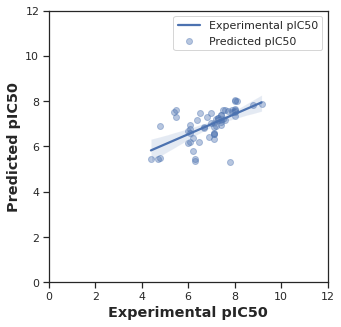

In [154]:
# Scatter plot of Experimental vs Predicted pic50 values

sns.set(color_codes=True)
sns.set_style("ticks")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.legend(["Experimental pIC50","Predicted pIC50"])
plt.show